### INX Future Inc ,  is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. With this Project our objective is to predict the employee performance /Rating based on the given feaatures and the performance's relation on them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

### 1. Data Preprocessing & Data Exploration:


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\surya\\Desktop\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (2).csv')


### Displaying the top 5 rows of each column /Feature in the dataset

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

###  Full summary of the dataframe using data.info

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       


### We have 19 integer/numerical features and 9 object/categorical Features.

### 2.Exporatory Data Analysis:

In [6]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


### Inferential Statistics : From the describe function results, we see that the count of each feature is 1200 and the maximum Rating is 4 and minimum rating is 2.Mean Value of Age is 36.91, and mean distance from home is 9.16 units.Mean EmpJobSatisfaction is 2.7325, Mean Salary hike percent is 15.225.

1.EmphourlyRate ranges from 30 to 100 and its average value is 65.981.

2.The Average EmpJobInvolvement is 2.73 which suggests that most of the employees are Having 'High' EmpJobInvolvement than the ones with 'Low','medium' and 'Very High' EmpJobInvolvement.

3.Average Value of EmpJobLevel is 2.067500 which is almost tending towards 2.From this one could infer that most of theemployees fall under EmpJobLevel'2'.

4.Mean EmpLastSalaryHikePercent is 15.225 which suggests that most of the employees and std is 3.65 i.e most of the EmpLastSalaryHikePercent values are in between 12 and 18.

5.Mean TotalWorkExperienceInYears is 11.33 yrs.

6.Mean EmpWorkLifeBalance is 2.744167 which almost tends to 3.It means that most of the Employees fall under 'Better' EmpWorkLifeBalance.

7.Mean ExperienceYearsAtThisCompany value is 7.077500 and std is 6.236899.

8.Mean ExperienceYearsInCurrentRole is 4.291667 yrs which suggest that most of the employees are almost highly expertised in the role/job code they are working in.

9.Mean Performance Rating is 2.948333 which almost raring 3.It is inferred from the mean rating value that most of the employees have got 3 as their performance rating.

### Checking for Null Values / Missing Values:

In [7]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### It is inferred that the given data has no null/missing values. not fill or drop any missing values , columns.

### Splitting into numerical and categorical columns:

In [8]:
df2=df[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition','OverTime']]
df3=df.drop(['EmpNumber','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition','OverTime'],axis=1)

In [9]:
df2.head()


,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,Attrition,OverTime
0,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,No,Yes
3,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No


In [10]:
df3.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


### 3.Visualizing the DATA using different Plots:


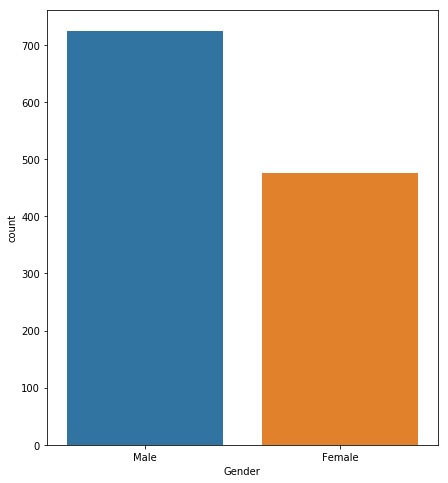

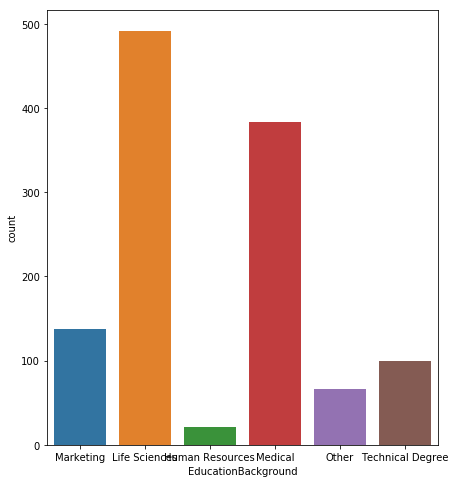

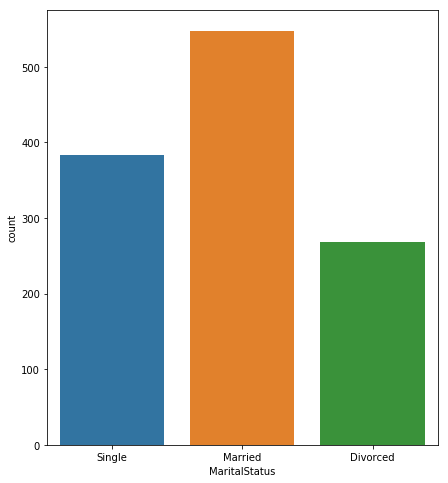

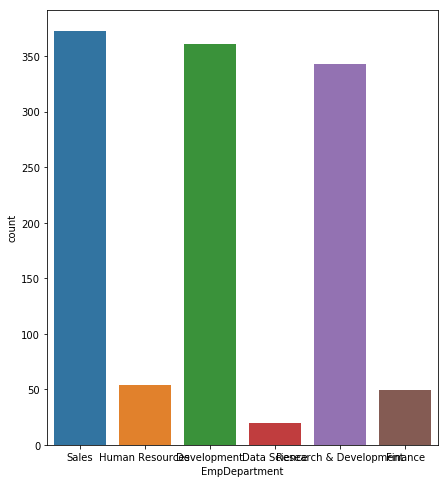

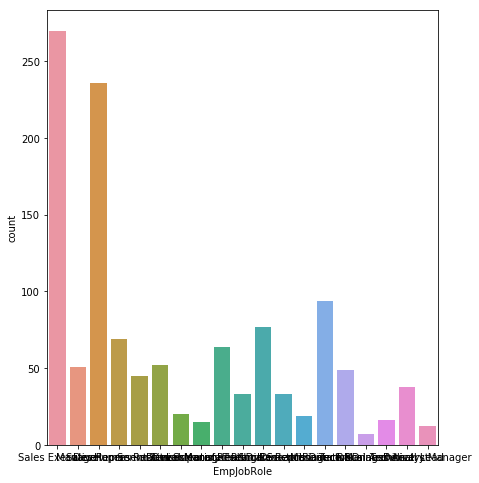

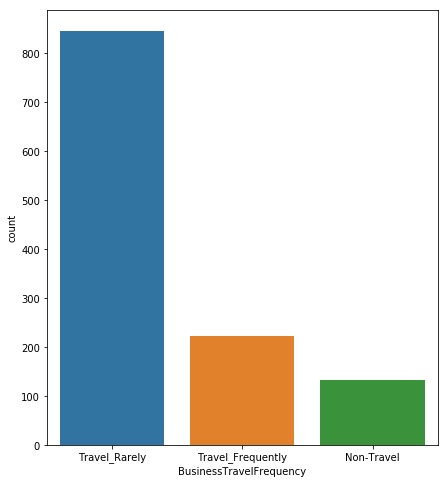

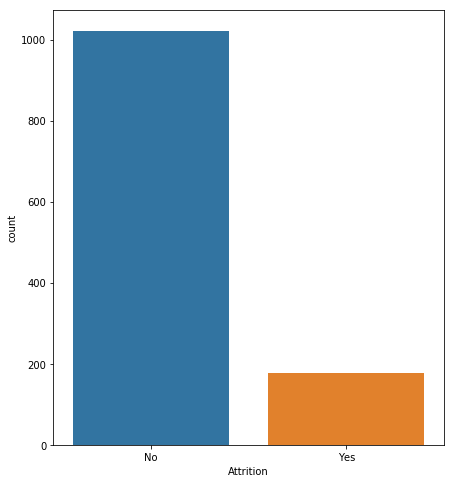

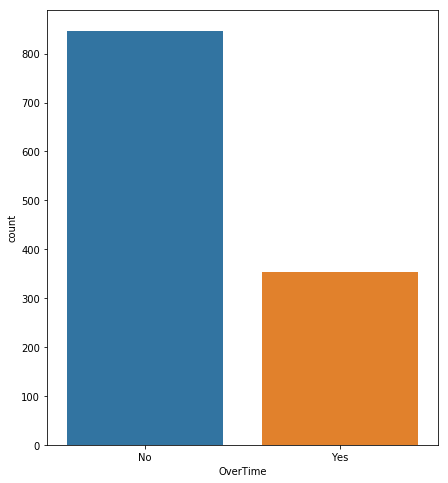

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
for i, col in enumerate(df2.columns):
    plt.figure(figsize=(7,8))
    sns.countplot(x=df2[col])
    

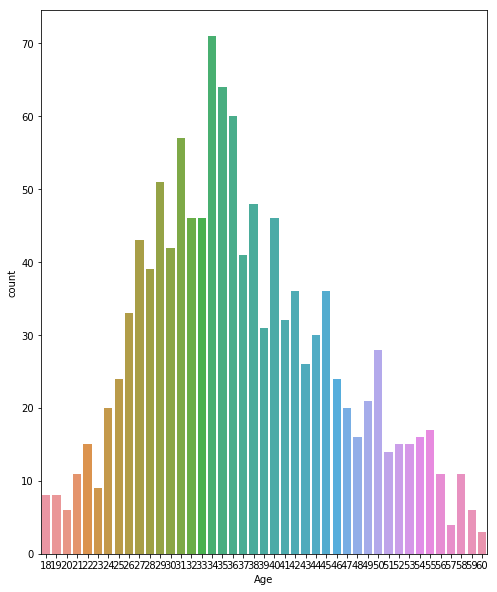

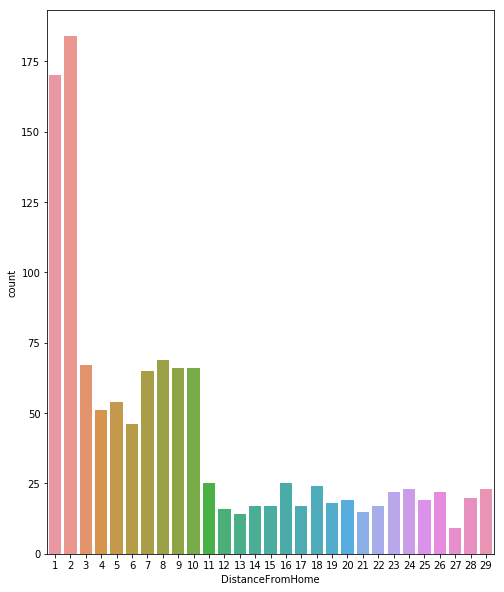

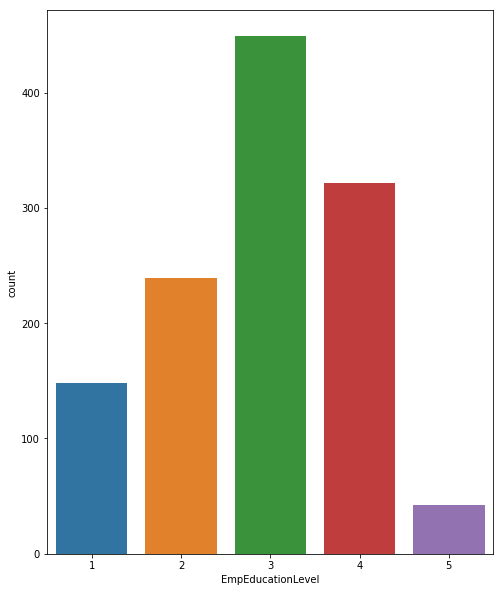

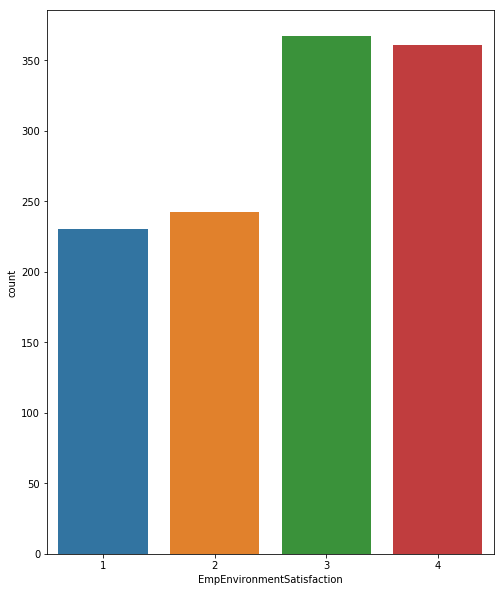

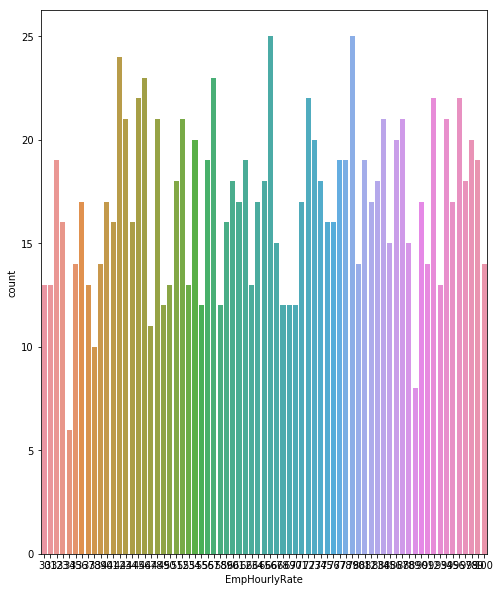

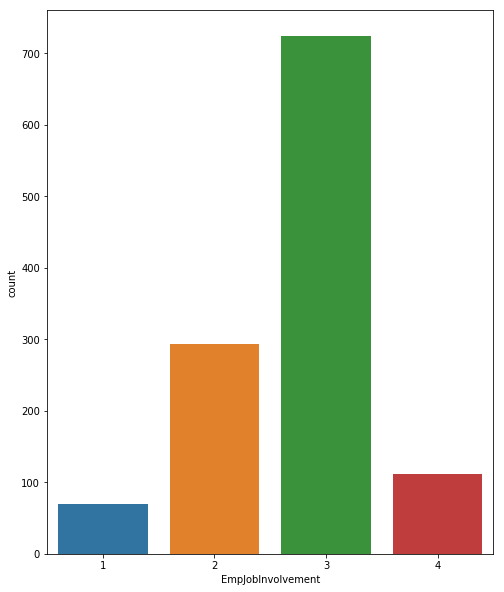

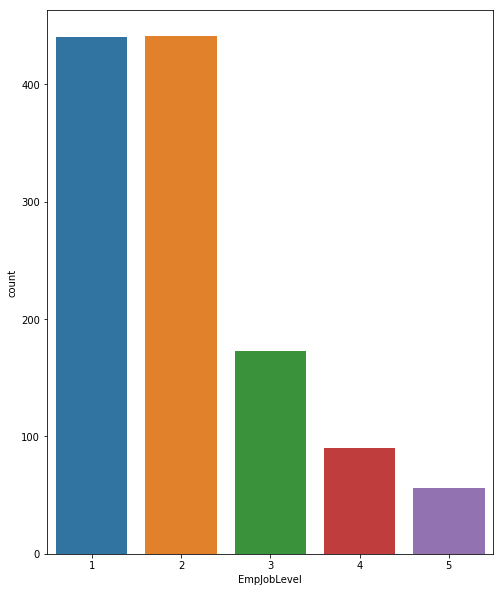

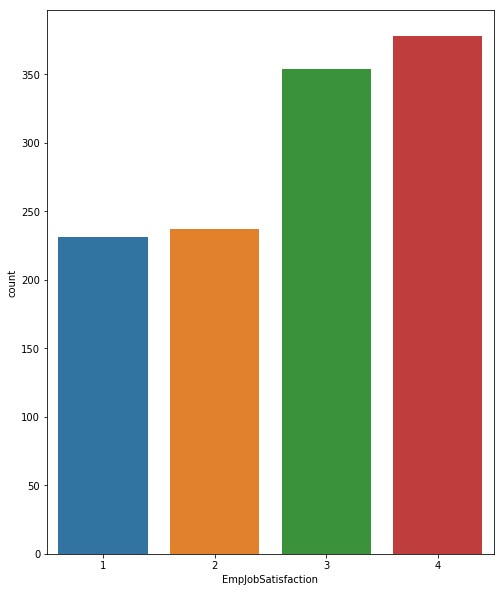

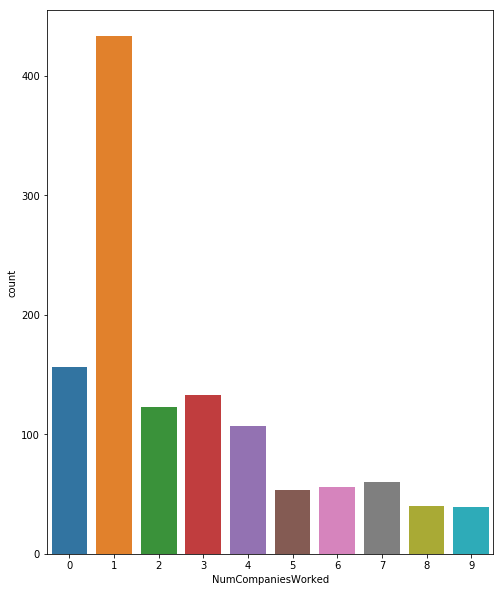

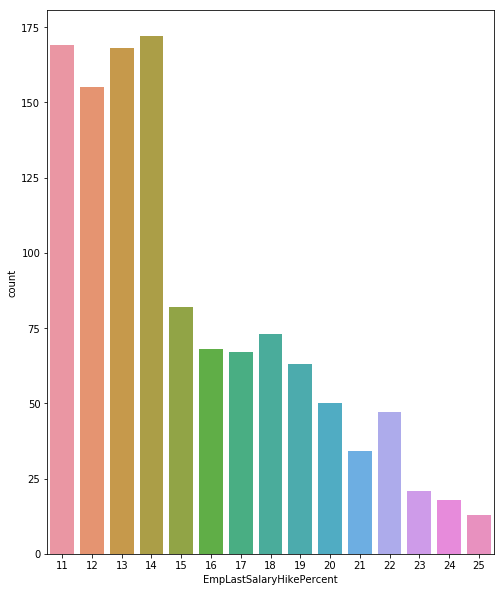

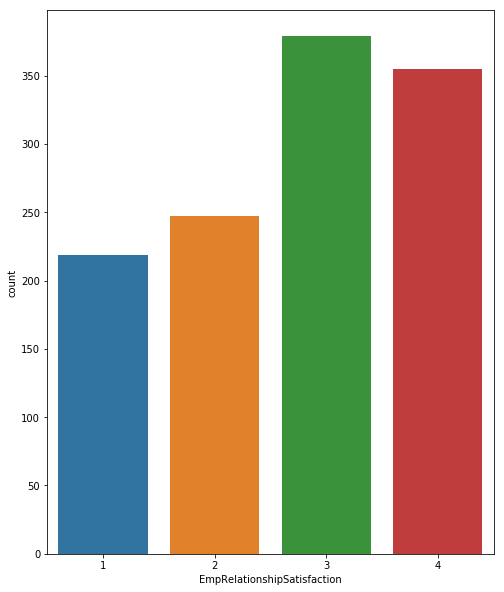

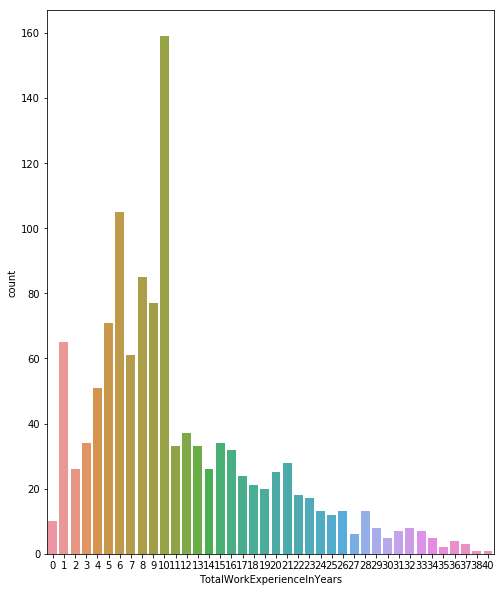

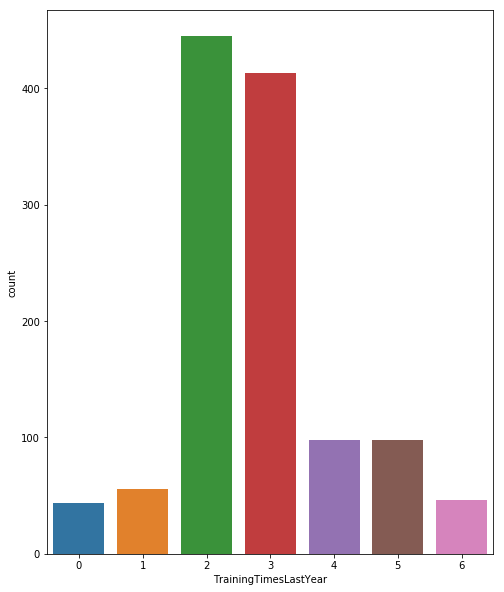

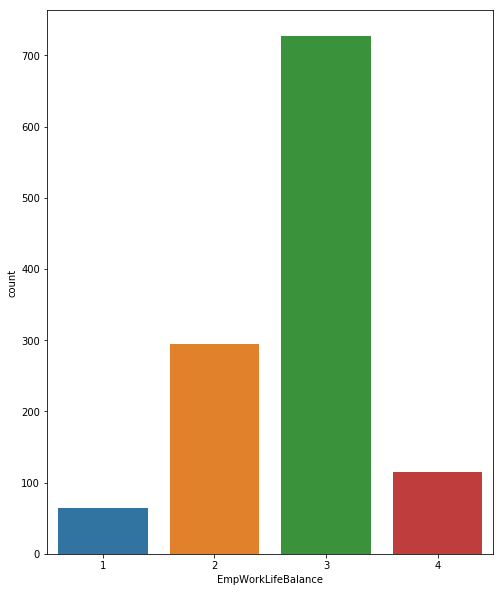

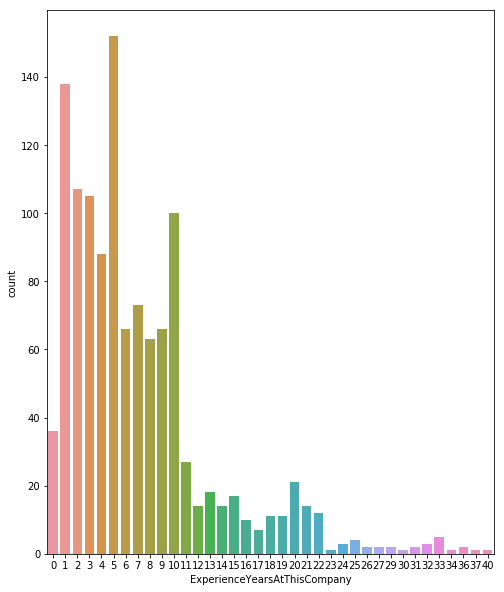

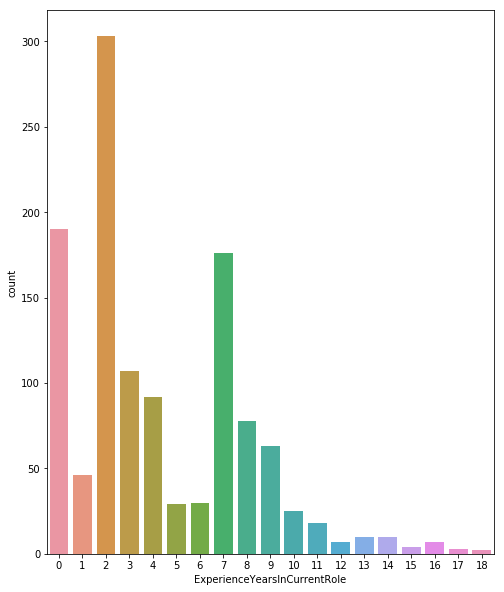

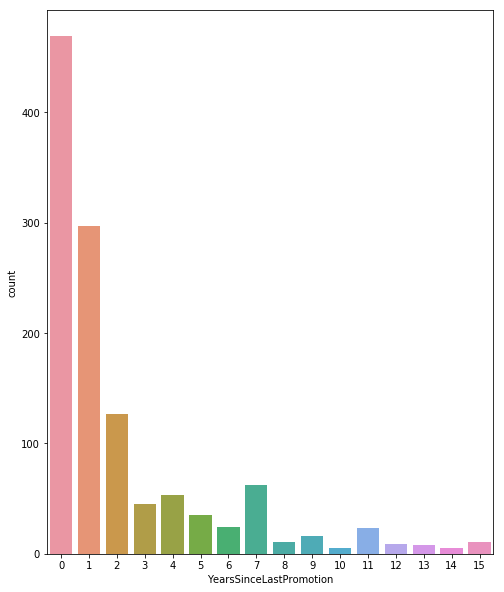

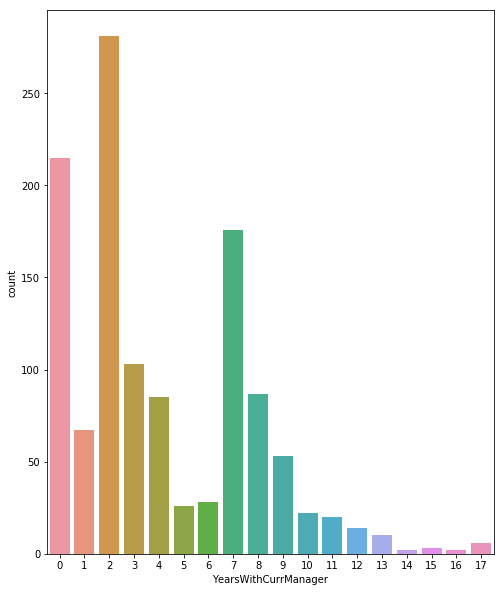

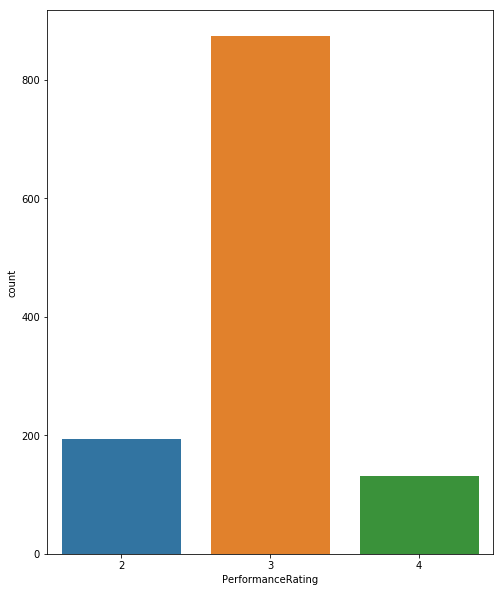

In [12]:
for i, col in enumerate(df3.columns):
    plt.figure(i,figsize=(8,10))
    sns.countplot(x=df3[col],data=df3)
    

### Data Visualization using Historgram :

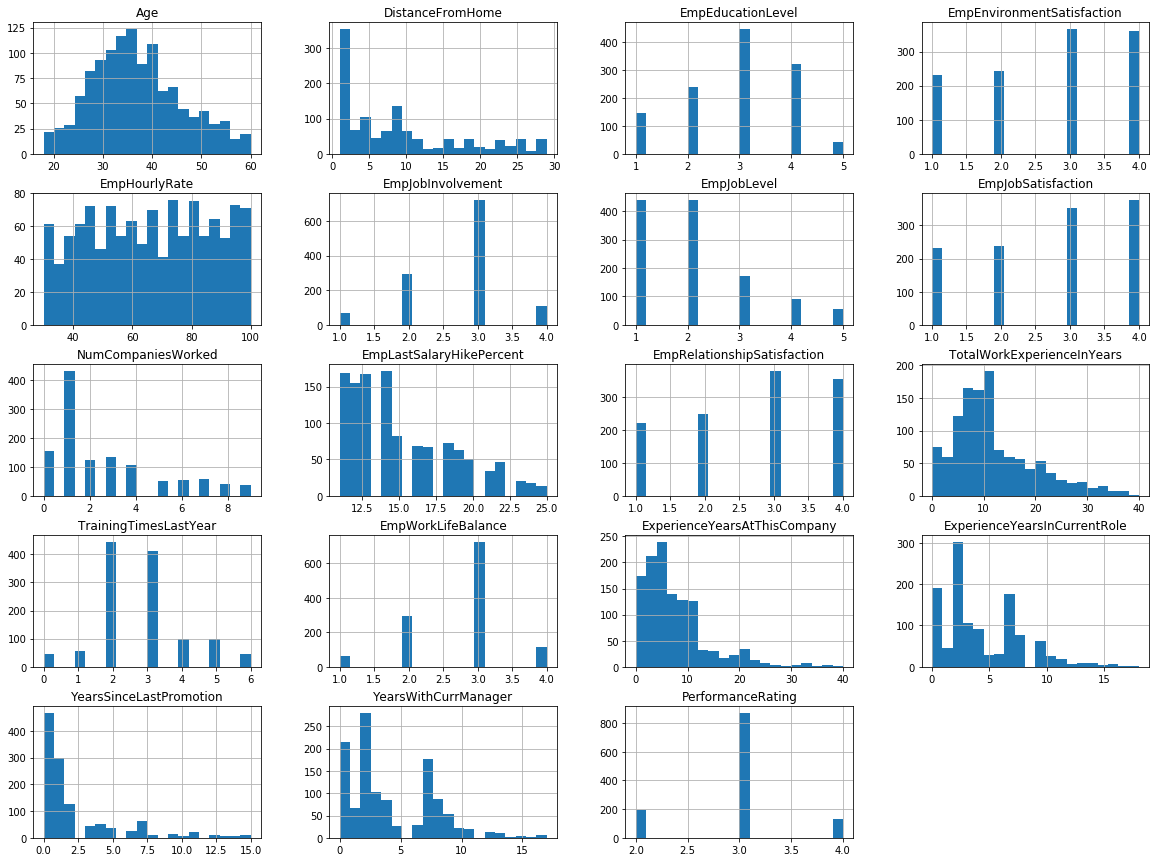

In [13]:
num_bins = 20

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

### Checking correlation of the data:

In [14]:
corr = df.corr()
corr['PerformanceRating'].sort_values(ascending = False)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpJobSatisfaction              0.000606
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64


#### 4. Label Encoding of the Given Data:

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])

In [16]:
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


### Heat Map:

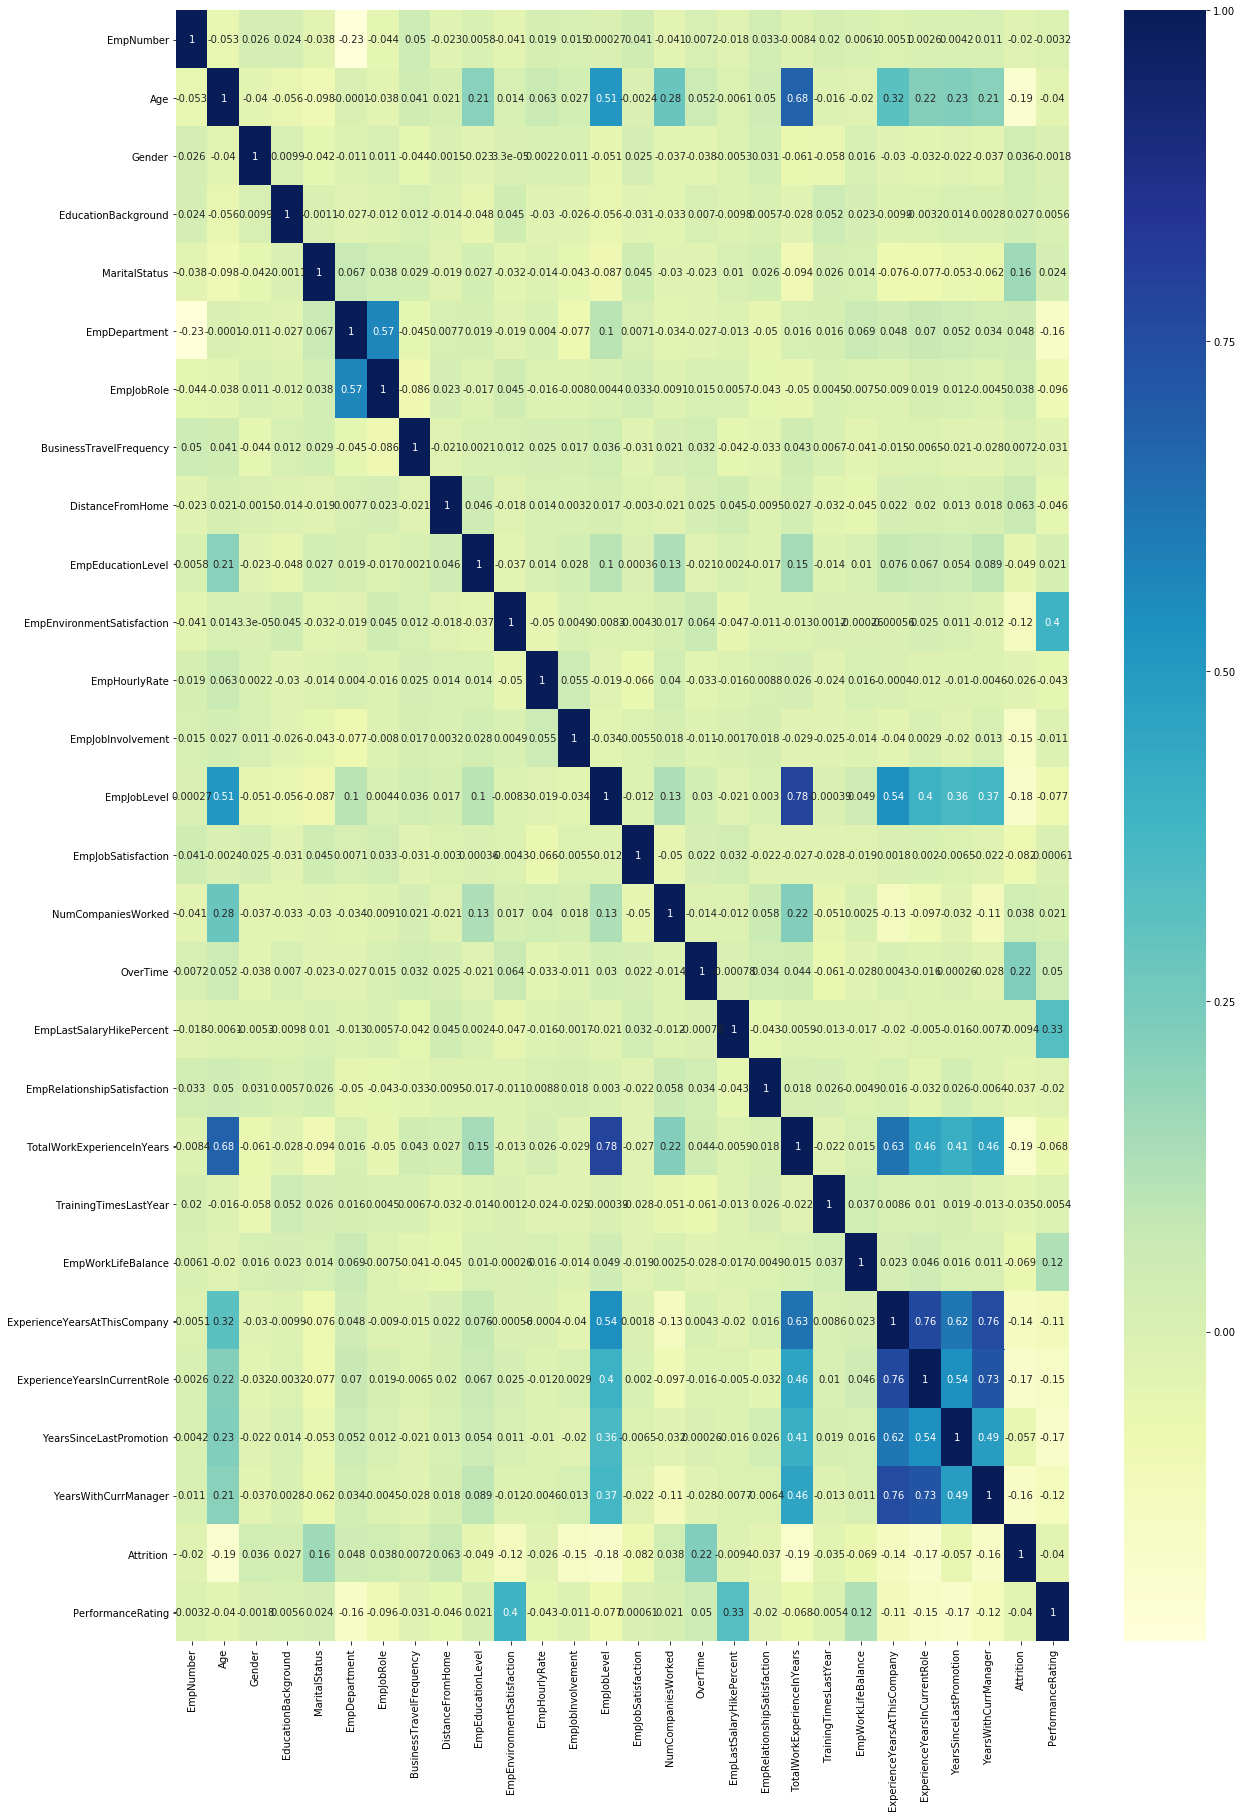

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(corr, annot=True, ax=ax, cmap = "YlGnBu")

### 5.Train_Test_Splitting of the Given Data:

In [18]:
x = df.drop(columns=['PerformanceRating','EmpNumber','Age','Gender','MaritalStatus'])
y = df['PerformanceRating']


In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 13)


In [20]:
x_train.shape

(840, 23)

In [21]:
x_test.shape

(360, 23)

### Applying Machine Learning Algorithms / Data Modelling:

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Scaling the Given Data Using StandardScaler:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### Logistic Regression:

In [24]:
from sklearn.linear_model import LogisticRegression
Log_model = LogisticRegression()
Log_model.fit(x_train,y_train)
y_predict = Log_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8194444444444444

In [25]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,29,29,1
3,17,238,4
4,2,12,28


In [26]:
confusion_matrix(y_test,y_predict)

array([[ 29,  29,   1],
       [ 17, 238,   4],
       [  2,  12,  28]], dtype=int64)

In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.60      0.49      0.54        59
           3       0.85      0.92      0.88       259
           4       0.85      0.67      0.75        42

    accuracy                           0.82       360
   macro avg       0.77      0.69      0.72       360
weighted avg       0.81      0.82      0.81       360



### DecisionTreeClassifier:

In [28]:
from sklearn.tree import DecisionTreeClassifier
Dec_Tree_model = DecisionTreeClassifier()
Dec_Tree_model.fit(x_train,y_train)
y_predict = Dec_Tree_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8916666666666667

In [29]:
pd.crosstab(y_test,y_predict)



col_0,2,3,4
PerformanceRating,,,
2,50,9,0
3,13,238,8
4,2,7,33


In [30]:
confusion_matrix(y_test,y_predict)

array([[ 50,   9,   0],
       [ 13, 238,   8],
       [  2,   7,  33]], dtype=int64)

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.77      0.85      0.81        59
           3       0.94      0.92      0.93       259
           4       0.80      0.79      0.80        42

    accuracy                           0.89       360
   macro avg       0.84      0.85      0.84       360
weighted avg       0.89      0.89      0.89       360



### RandomForestClassifier:

In [32]:
from sklearn.ensemble import RandomForestClassifier
Rand_For_model = RandomForestClassifier(random_state=13,n_estimators=100)
Rand_For_model.fit(x_train,y_train)
y_predict = Rand_For_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9277777777777778

In [33]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,51,8,0
3,7,252,0
4,1,10,31


In [34]:
confusion_matrix(y_test,y_predict)

array([[ 51,   8,   0],
       [  7, 252,   0],
       [  1,  10,  31]], dtype=int64)

In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.86      0.86      0.86        59
           3       0.93      0.97      0.95       259
           4       1.00      0.74      0.85        42

    accuracy                           0.93       360
   macro avg       0.93      0.86      0.89       360
weighted avg       0.93      0.93      0.93       360



### KNeighborsClassifier:

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
y_predict = KNN_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.75

In [37]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,17,42,0
3,12,246,1
4,4,31,7


In [38]:
confusion_matrix(y_test,y_predict)

array([[ 17,  42,   0],
       [ 12, 246,   1],
       [  4,  31,   7]], dtype=int64)

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.52      0.29      0.37        59
           3       0.77      0.95      0.85       259
           4       0.88      0.17      0.28        42

    accuracy                           0.75       360
   macro avg       0.72      0.47      0.50       360
weighted avg       0.74      0.75      0.71       360



### XGBClassifier:

In [40]:
from xgboost import XGBClassifier
XGB_Classfr_model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
XGB_Classfr_model.fit(x_train,y_train)
y_predict = XGB_Classfr_model.predict(x_test)
accuracy_score(y_test,y_predict)

[21:24:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.925

In [41]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,52,7,0
3,8,247,4
4,0,8,34


In [42]:
confusion_matrix(y_test,y_predict)


array([[ 52,   7,   0],
       [  8, 247,   4],
       [  0,   8,  34]], dtype=int64)

In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.87      0.88      0.87        59
           3       0.94      0.95      0.95       259
           4       0.89      0.81      0.85        42

    accuracy                           0.93       360
   macro avg       0.90      0.88      0.89       360
weighted avg       0.92      0.93      0.92       360



### Support vector machine/SVM Machine Learning:

In [44]:
from sklearn.svm import SVC
SVM_model = SVC(gamma=0.01,kernel='rbf')
SVM_model.fit(x_train,y_train)
y_predict = SVM_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7611111111111111

In [45]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,10,49,0
3,0,259,0
4,0,37,5


In [46]:
confusion_matrix(y_test,y_predict)

array([[ 10,  49,   0],
       [  0, 259,   0],
       [  0,  37,   5]], dtype=int64)

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.17      0.29        59
           3       0.75      1.00      0.86       259
           4       1.00      0.12      0.21        42

    accuracy                           0.76       360
   macro avg       0.92      0.43      0.45       360
weighted avg       0.82      0.76      0.69       360



In [48]:
modeldata = pd.DataFrame(data=None,columns=['accuracy_score'], index=['RandomForestClassifier','KNeighborsClassifier','Logistic Regression','XGBClassifier','DecisionTreeClassifier','Support vector machine'])
modeldata['accuracy_score'][0] = 0.9277777777777778
modeldata['accuracy_score'][1] = 0.75
modeldata['accuracy_score'][2] = 0.8194444444444444
modeldata['accuracy_score'][3] = 0.925
modeldata['accuracy_score'][4] = 0.8916666666666667
modeldata['accuracy_score'][5] = 0.7611111111111111
modeldata


,accuracy_score
RandomForestClassifier,0.927778
KNeighborsClassifier,0.75
Logistic Regression,0.819444
XGBClassifier,0.925
DecisionTreeClassifier,0.891667
Support vector machine,0.761111


### Conclusions

 We have used all the Classification Algorithms like LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(),,XGBClassifier(),SVM Techniques and compared their performances based on the Accuracy Score.By Analyzing the Crosstab function, Confusion matrix and Accuracy scores, we infer that XGBoost and RandomForest Classifier have been executed with 0.925 and 0.927 Accuracy Scores respectively.So We conclude that  XGBoost Classifier or Random Forest Classifier for the above study to predict the Employee Performance.

### Modelling Analysis and Conclusions:

We have used all the Classification Algorithms like LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(),MLPClassifier(),XGBClassifier(),SVM Techniques and compared their performances based on the Accuracy Score.By Analyzing the Crosstab function, Confusion matrix and Accuracy scores, we infer that XGBoost and RandomForest Classifier have been executed with 0.93 and 0.92 Accuracy Scores respectively.So We conclude to use XGBoost Classifier or Random Forest Classifier for the above study to predict the Employee Performance.

#The following insights are expected from this project.

Department wise performances
Top 3 Important Factors effecting employee performance
A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
Recommendations to improve the employee performance based on insights from analysis.

### Answer to 1st Question:

### Evaluating Departmentwise Performance Rating

In [49]:
print(df.groupby('EmpDepartment').mean()['PerformanceRating'])

EmpDepartment
0    3.050000
1    3.085873
2    2.775510
3    2.925926
4    2.921283
5    2.860590
Name: PerformanceRating, dtype: float64


In [50]:
print(df.groupby('EmpDepartment').describe()['PerformanceRating'])

               count      mean       std  min  25%  50%  75%  max
EmpDepartment                                                    
0               20.0  3.050000  0.394034  2.0  3.0  3.0  3.0  4.0
1              361.0  3.085873  0.388508  2.0  3.0  3.0  3.0  4.0
2               49.0  2.775510  0.586846  2.0  2.0  3.0  3.0  4.0
3               54.0  2.925926  0.544331  2.0  3.0  3.0  3.0  4.0
4              343.0  2.921283  0.559016  2.0  3.0  3.0  3.0  4.0
5              373.0  2.860590  0.555400  2.0  3.0  3.0  3.0  4.0


### From the above results,it's inferred that :

The mean performance rating in Data Science Department is 3.05.
The mean performance rating in Development Department is 3.085873.
The mean performance rating in Finance Department is 2.775510.
The mean performance rating in Human Resources Department is 2.925926.
The mean performancerating in Research & Development Department is 2.921283.
The mean performance rating in Sales Department is 2.860590.

### Answer to 2nd Question:

### Top 3 Important Factors effecting employee performance:

### A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

We have used all the Classification Algorithms like LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(),MLPClassifier(),XGBClassifier(),SVM Techniques and compared their performances based on the Accuracy Score.By Analyzing the Crosstab function, Confusion matrix and Accuracy scores, we infer that XGBoost and RandomForest Classifier have been executed with 0.93 and 0.92 Accuracy Scores respectively.So We conclude to use XGBoost Classifier or Random Forest Classifier for the above study to predict the Employee Performance.


### Answer to 3rd Question:

#### Recommendations to improve the employee performance based on insights from analysis.

From our study,it's clear thatTop 3 Important Factors effecting employee performance are 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction' and 'EmpJobInvolvement' .So we try to concentrate more on these factors.

From the scatterplot of x=EducationbackGround y=EmpDepartment, we infer that the employees from Finance and Sales Department have less PerformanceRating compared to other departments.So One should concentrate in these departments and improve their performance.
From the scatterplot of x=EducationbackGround y=EmpJobRole,it is observed that the employees with Job role such as 'Data Scientist','Finance Manager' and 'Sales Executive' have less performance rating comapared to other Job roles.So the Management needs to concentrate on the employees with these Jobroles and take effective measures to improve the employee performance.
.So EmpEnvironmentSatisfaction is plays a key role in Employee Performance and its rating and contributes a lot for our study.So EmpEnvironmentSatisfaction is positively correlated to PerformanceRating.
From the scatterplot of x=EducationbackGround,y=EmpJobInvolvement,it is inferred that the Employees with 'Very Low' EmpJobInvolvement are rated high compared to that of the employees with 'High' and 'Very High' EmpJobInvolvement .So EmpJobInvolvement is negatively correlated to PerformanceRating.
From the scatterplot of x=EducationbackGround,y=EmpJobLevel,it is inferred that the Employees with 'Very Low' EmpJobLevel are rated high compared to that of the employees with 'High' and 'Very High' EmpJobLevel .So EmpJobLevel is negatively correlated to PerformanceRating.
